In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import pickle

#### Original and Consensus

In [2]:
barcodes={}
for name in ['CHR','DNA','PCD']:
    cName = 'Consensus '+name
    
    with open('2 output/'+name+'.pkl',mode='rb') as f:
        barcodes[name]=pickle.load(f)
        
    with open('2 output/'+cName+'.pkl',mode='rb') as f:
        barcodes[cName]=pickle.load(f)
        
    numberOfCycles={}
    numberOfTetra={}
    for n in barcodes:
        numberOfCycles[n]=len([bc for bc in barcodes[n] if bc[0]==1])
        numberOfTetra[n]=len([bc for bc in barcodes[n] if bc[0]==2])


#### Random

In [45]:
barcodesRandomCycles={}
barcodesRandomTetra={}
barcodesRandom={}
for name in ['CHR','DNA','PCD']:    
    barcodesRandomCycles['Random '+name]=[]
    barcodesRandomTetra['Random '+name]=[]
    barcodesRandom['Random '+name]=[]
    for i in range(0,100):
        nameRand = name+' Random '+str(i)
        
        with open('2 output/'+nameRand+'.pkl',mode='rb') as f:
            barcode=pickle.load(f)
            barcodesRandom['Random '+name].append(barcode)
        
        barcodesRandomCycles['Random '+name].append(len([bc for bc in barcode if bc[0]==1]))
        barcodesRandomTetra['Random '+name].append(len([bc for bc in barcode if bc[0]==2]))

In [4]:
for key in barcodesRandomCycles:
    numberOfCycles[key +' Mean']=str(round(np.mean(barcodesRandomCycles[key]),1))
    numberOfCycles[key +' Std']=str(round(np.std(barcodesRandomCycles[key]),1))
    numberOfCycles[key +' Mean']+=' ('+numberOfCycles[key +' Std']+')'
    
for key in barcodesRandomTetra:
    numberOfTetra[key +' Mean']=str(round(np.mean(barcodesRandomTetra[key]),1))
    numberOfTetra[key +' Std']=str(round(np.std(barcodesRandomCycles[key]),1))
    numberOfTetra[key +' Mean']+=' ('+numberOfTetra[key +' Std']+')'

In [5]:
numberOfCycles

{'CHR': 18,
 'Consensus CHR': 15,
 'DNA': 19,
 'Consensus DNA': 15,
 'PCD': 27,
 'Consensus PCD': 23,
 'Random CHR Mean': '6.6 (2.0)',
 'Random CHR Std': '2.0',
 'Random DNA Mean': '4.6 (2.1)',
 'Random DNA Std': '2.1',
 'Random PCD Mean': '18.4 (2.4)',
 'Random PCD Std': '2.4'}

In [6]:
numberOfTetra

{'CHR': 4,
 'Consensus CHR': 2,
 'DNA': 7,
 'Consensus DNA': 4,
 'PCD': 11,
 'Consensus PCD': 10,
 'Random CHR Mean': '3.7 (2.0)',
 'Random CHR Std': '2.0',
 'Random DNA Mean': '4.3 (2.1)',
 'Random DNA Std': '2.1',
 'Random PCD Mean': '10.4 (2.4)',
 'Random PCD Std': '2.4'}

In [55]:
def plotBarcode(bc):
    data=[]
    for dim, timeLived in bc:
        if dim in [0,1]:
            data.append((dim,timeLived,timeLived[1]-timeLived[0],timeLived[0]))
    df=pd.DataFrame(data,columns=['Dim','BirthDeath','TimeLived','Birth'])
    df=df.sort_values(by=['BirthDeath','TimeLived'],ascending=False)
    colorsByDimension={0:'tab:red',1:'tab:blue',2:'tab:green',3:'tab:purple',4:'tab:orange'}
    i=0
    groups=list(df.groupby(by=['Dim']))
    for dim,df in groups:        
        for _,df2 in df.groupby(by=['Birth']):
            timeLived=list(df2['BirthDeath'])
            for birth,death in timeLived:                
                plt.broken_barh(xranges=[(birth, death-birth)], yrange=(len(data)-i, 0.25),color=colorsByDimension[dim])
                i+=1

    #add the continuos line 
    xMin,xMax=plt.xlim()
    plt.broken_barh(xranges=[(0,xMax)], yrange=(i, 0.25),color=colorsByDimension[0])
    plt.xlim(0,xMax)
    plt.ylim(0,235)
    print(len(data))

233
193
188


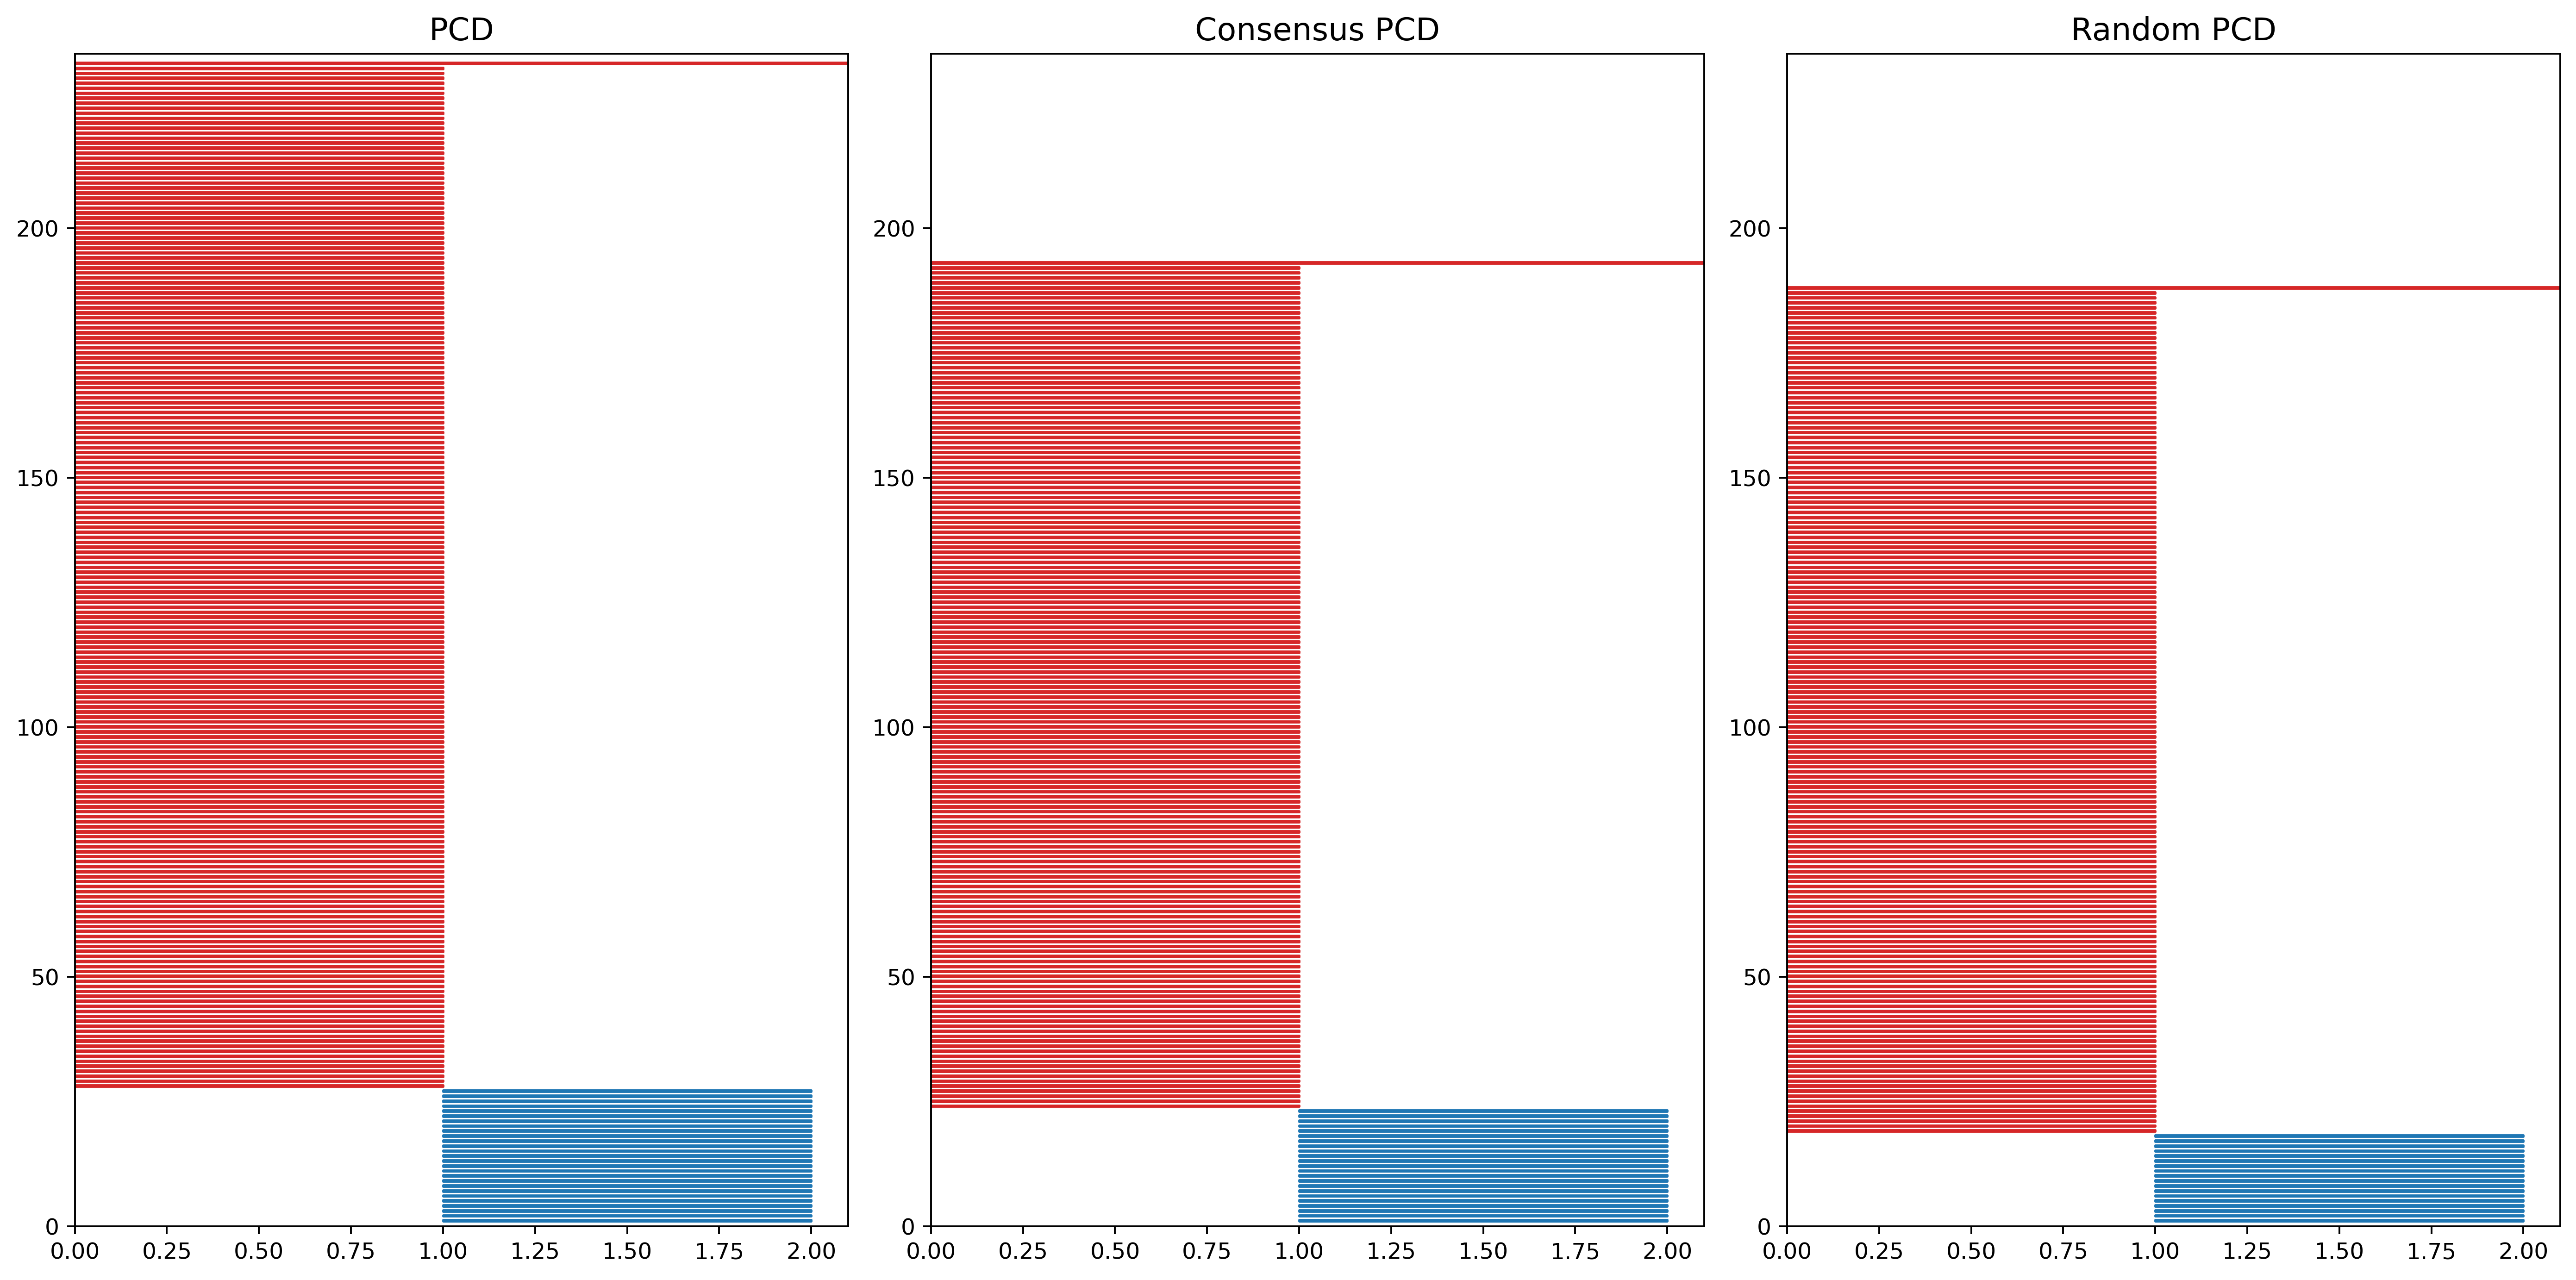

In [56]:
plt.figure(figsize=(16,8),dpi=350)

plt.subplot(1,3,1)
plotBarcode(barcodes['PCD'])        
plt.title('PCD',fontsize=14)
plt.tight_layout()

plt.subplot(1,3,2)
plotBarcode(barcodes['Consensus PCD'])        
plt.title('Consensus PCD',fontsize=14)
plt.tight_layout()


plt.subplot(1,3,3)
plotBarcode(barcodesRandom['Random PCD'][0])        
plt.title('Random PCD',fontsize=14)
plt.tight_layout()

#plt.suptitle('Networks Barcodes\n',fontsize=20)
plt.savefig('2.1 output/barcodes table1 v2.png',facecolor='w')
plt.tight_layout()
plt.show()